# Reservoir Characterization Using Machine Learning

### **Author:** Amalendu Das

**Objective:** Apply machine learning techniques to reservoir characterization using real-world datasets. This project explores feature engineering, predictive modeling, and model evaluation techniques relevant to oil and gas workflows.


---


## Table of Contents

1. [Introduction](#Introduction)
2. [Dataset Overview](#Dataset-Overview)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
4. [Feature Engineering](#Feature-Engineering)
5. [Model Development](#Model-Development)
6. [Model Evaluation](#Model-Evaluation)
7. [Extended Work](#Extended-Work)
8. [Conclusion](#Conclusion)

---


# Reservoir Characterization

Reservoir characterization is a critical process in the oil and gas industry that involves understanding the physical and chemical properties of subsurface reservoirs to optimize exploration and production. Traditionally, this process relies on analyzing seismic data, well logs, and core samples using manual or semi-automated methods. However, with the growing availability of large datasets and advancements in computational power, machine learning (ML) has emerged as a powerful tool to enhance reservoir characterization.

Machine learning enables the integration and analysis of diverse datasets, such as seismic attributes, well logs, and production data, to build accurate reservoir models. These models provide valuable insights into key reservoir properties, including porosity, permeability, fluid saturation, and lithology. By leveraging ML algorithms, geoscientists and engineers can automate tasks, identify hidden patterns, and make predictions with higher accuracy and efficiency.

From seismic interpretation to petrophysical property estimation, ML techniques transform reservoir characterization by reducing time, improving precision, and supporting data-driven decision-making. This integration of advanced computational methods is paving the way for smarter and more efficient hydrocarbon exploration and production strategies.






## Dataset Overview


The dataset used in this study consists of measurements collected at half-foot depth intervals, representing a diverse range of geological features and well log responses. This dataset has been made available in the repository accompanying this project.

The dataset includes the following features:

Gamma Ray (GR): Measures natural radioactivity in the subsurface, useful for distinguishing between shale and other rock types.

Resistivity (ILD_log10): Logarithm of deep induction resistivity, indicating fluid content and lithology.

Photoelectric Effect (PE): Reflects the interaction of rocks with gamma rays, aiding in lithology identification.

Neutron-Density Porosity Difference (DeltaPHI): Highlights porosity contrasts, which are critical for reservoir quality assessment.

Average Neutron-Density Porosity (PHIND): Provides an average measure of reservoir porosity.

Nonmarine/Marine Indicator (NM_M): A categorical variable indicating depositional environment.

Relative Position (RELPOS): Represents the relative stratigraphic position within the reservoir sequence.

Additionally, the dataset includes a facies label corresponding to the rock type (e.g., shale, sandstone, limestone) at each depth interval. In machine learning terms, each depth interval corresponds to a feature vector associated with a specific class (facies type). This comprehensive dataset offers a robust foundation for applying machine learning models to reservoir characterization.



In [1]:
#importing Library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the Data
data = pd.read_csv('training_data.csv')

In [3]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [4]:
data.tail()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661
3231,5,C LM,CHURCHMAN BIBLE,3122.5,50.031,0.970,2.609,6.668,3.295,2,0.653


In [6]:
#Data description
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


To evaluate the accuracy of the classifier, we will remove one well from the training set so that we can compare the predicted and actual facies labels.

In [7]:
data['Well Name'].unique()

array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

In [8]:
test_well = data[data['Well Name'] == 'SHANKLE']

In [9]:
# Updated code cell
test_well.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
471,2,A1 SH,SHANKLE,2774.5,98.36,0.642,-0.1,18.685,2.9,1,1.000
472,2,A1 SH,SHANKLE,2775.0,97.57,0.631,7.9,16.745,3.2,1,0.984
473,2,A1 SH,SHANKLE,2775.5,98.41,0.615,12.8,14.105,3.2,1,0.968
474,2,A1 SH,SHANKLE,2776.0,85.92,0.597,13.0,13.385,3.4,1,0.952
475,2,A1 SH,SHANKLE,2776.5,83.16,0.592,12.3,13.345,3.4,1,0.935


In [10]:
#drop SHANKLE from dataframe
data = data[data['Well Name'] != 'SHANKLE']

In [11]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


Let's extract the feature vectors anfacies_labelsfafaff___iated facies labels from the training data set:

In [12]:
features= data.drop(['Facies'], axis =1)
features.head()

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [13]:
#Drop unneccessary columns. Formation is similar to facies. Well name & depth not relevant in predicting Facies type.
features= features.drop(['Formation', 'Well Name', 'Depth'], axis =1)
features.head()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,78.26,0.661,14.2,12.565,4.1,1,0.979
2,79.05,0.658,14.8,13.050,3.6,1,0.957
3,86.10,0.655,13.9,13.115,3.5,1,0.936
4,74.58,0.647,13.5,13.300,3.4,1,0.915


In [15]:
facies_labels = data['Facies'].values

In [16]:
facies_labels

array([3, 3, 3, ..., 5, 5, 5])

# Porosity Calculation

In [5]:
# Ensure the necessary columns exist in the dataset
required_columns = ['Well Name', 'Depth', 'PHIND']  # Replace or add columns as per the actual dataset
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' is missing in the dataset. Please check your data.")

In [8]:
# Group the data by the well identifier and analyze porosity
grouped_wells = data.groupby('Well Name')

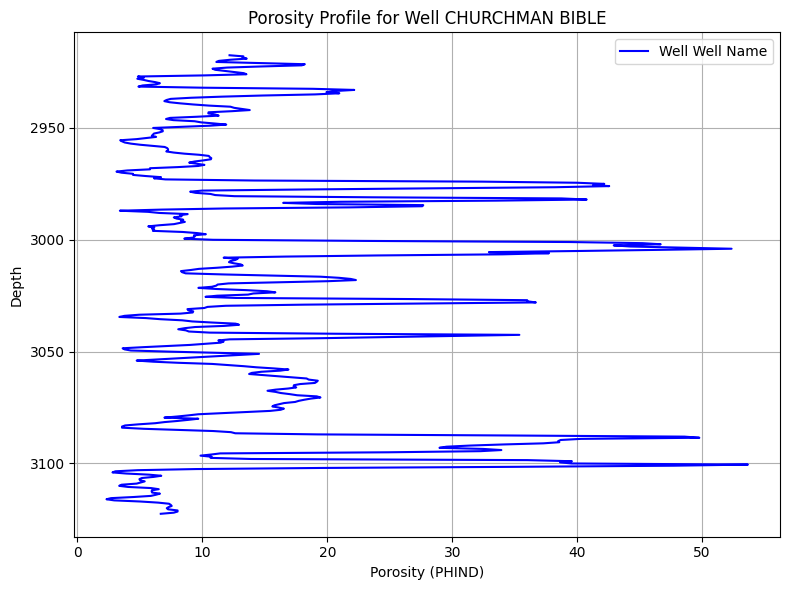

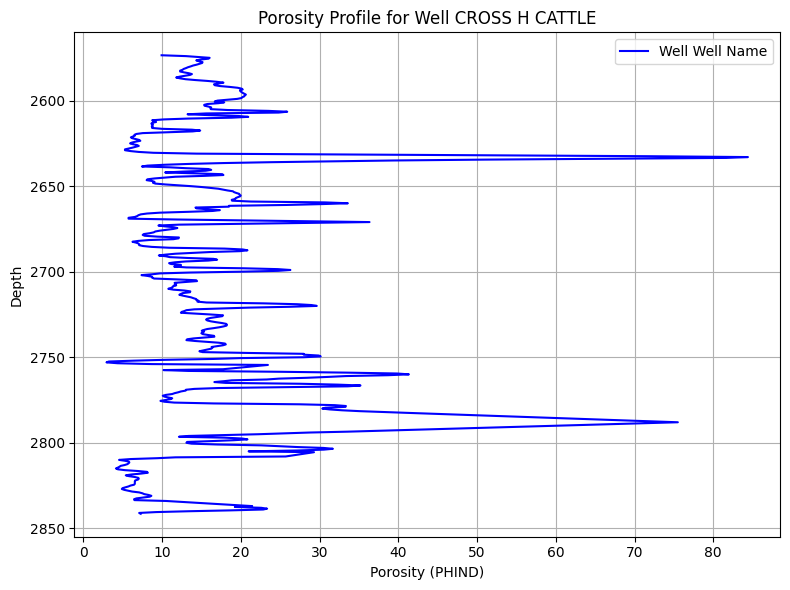

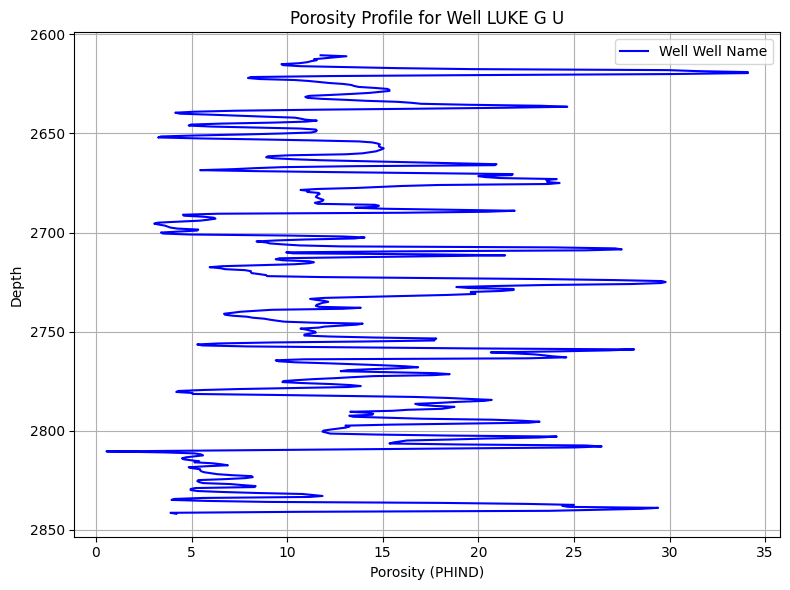

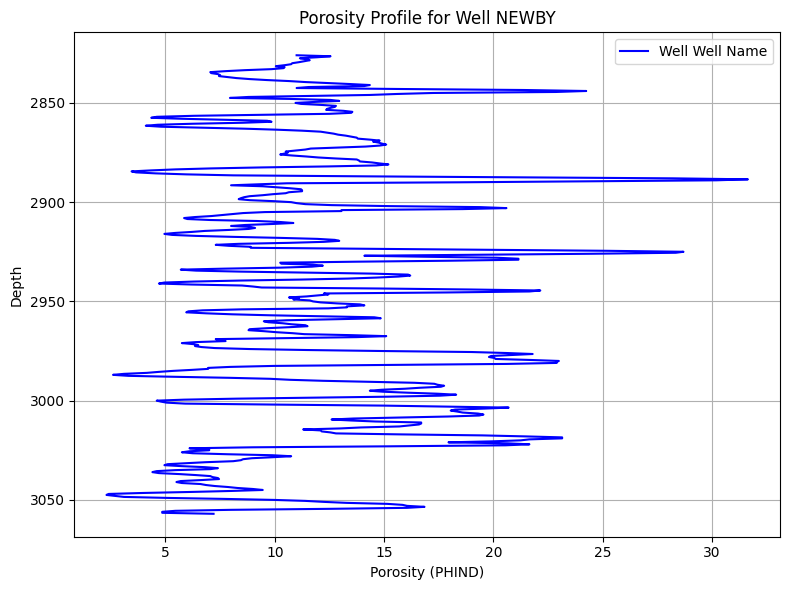

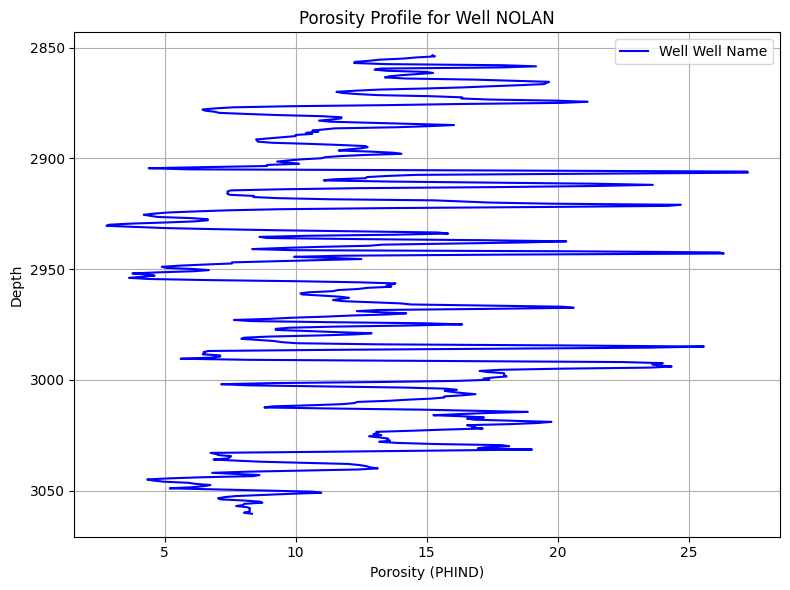

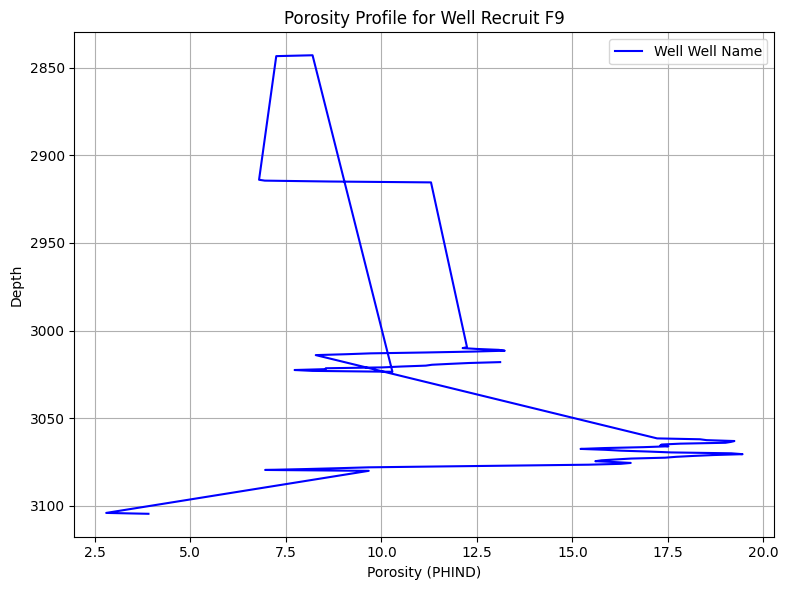

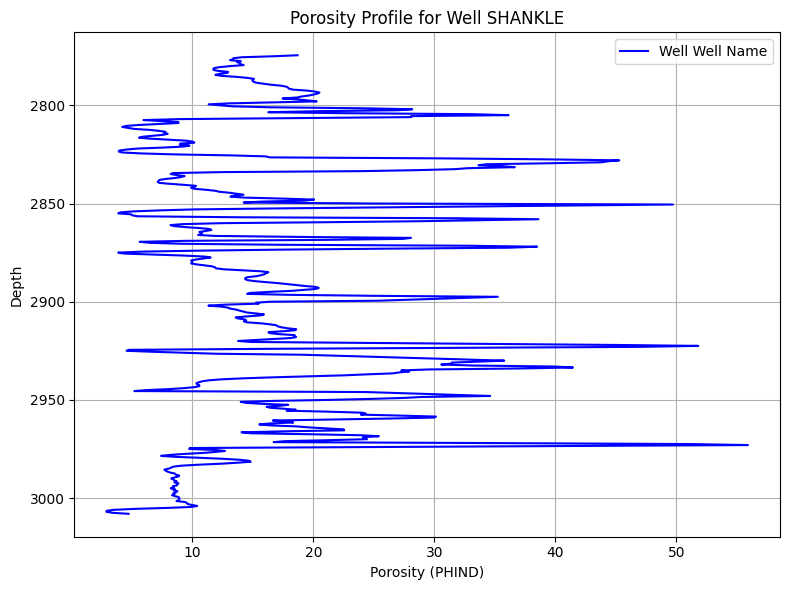

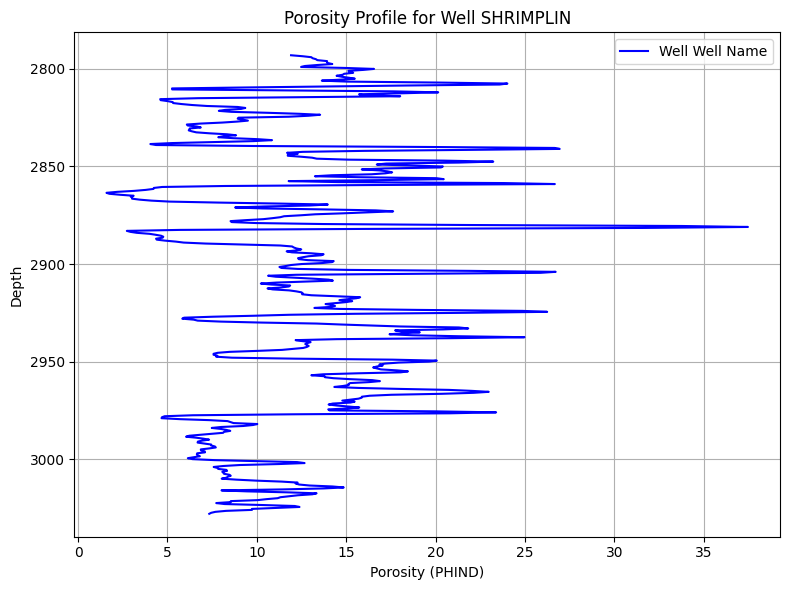

Processed porosity data saved to 'processed_porosity_data.csv'.


In [12]:
# Iterate through wells and plot porosity profiles
for well_id, well_data in grouped_wells:
    plt.figure(figsize=(8, 6))
    plt.plot(well_data['PHIND'], well_data['Depth'], label=f"Well {'Well Name'}", color='blue')
    plt.gca().invert_yaxis()  # Invert depth axis for better visualization
    plt.xlabel("Porosity (PHIND)")
    plt.ylabel("Depth")
    plt.title(f"Porosity Profile for Well {well_id}")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Save processed data with porosity calculations (if applicable)
output_file = "processed_porosity_data.csv"
data.to_csv(output_file, index=False)
print(f"Processed porosity data saved to '{output_file}'.")

# Visualize the rock type

In [17]:
#importing more libraries
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


Before we plot the well data, let's define a color map so the facies are represented by consistent color in all the plots in this tutorial. We also create the abbreviated facies labels, and add those to the facies_vectors dataframe.

In [18]:
# 1=sandstone  2=c_siltstone   3=f_siltstone
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

data.loc[:,'FaciesLabels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)


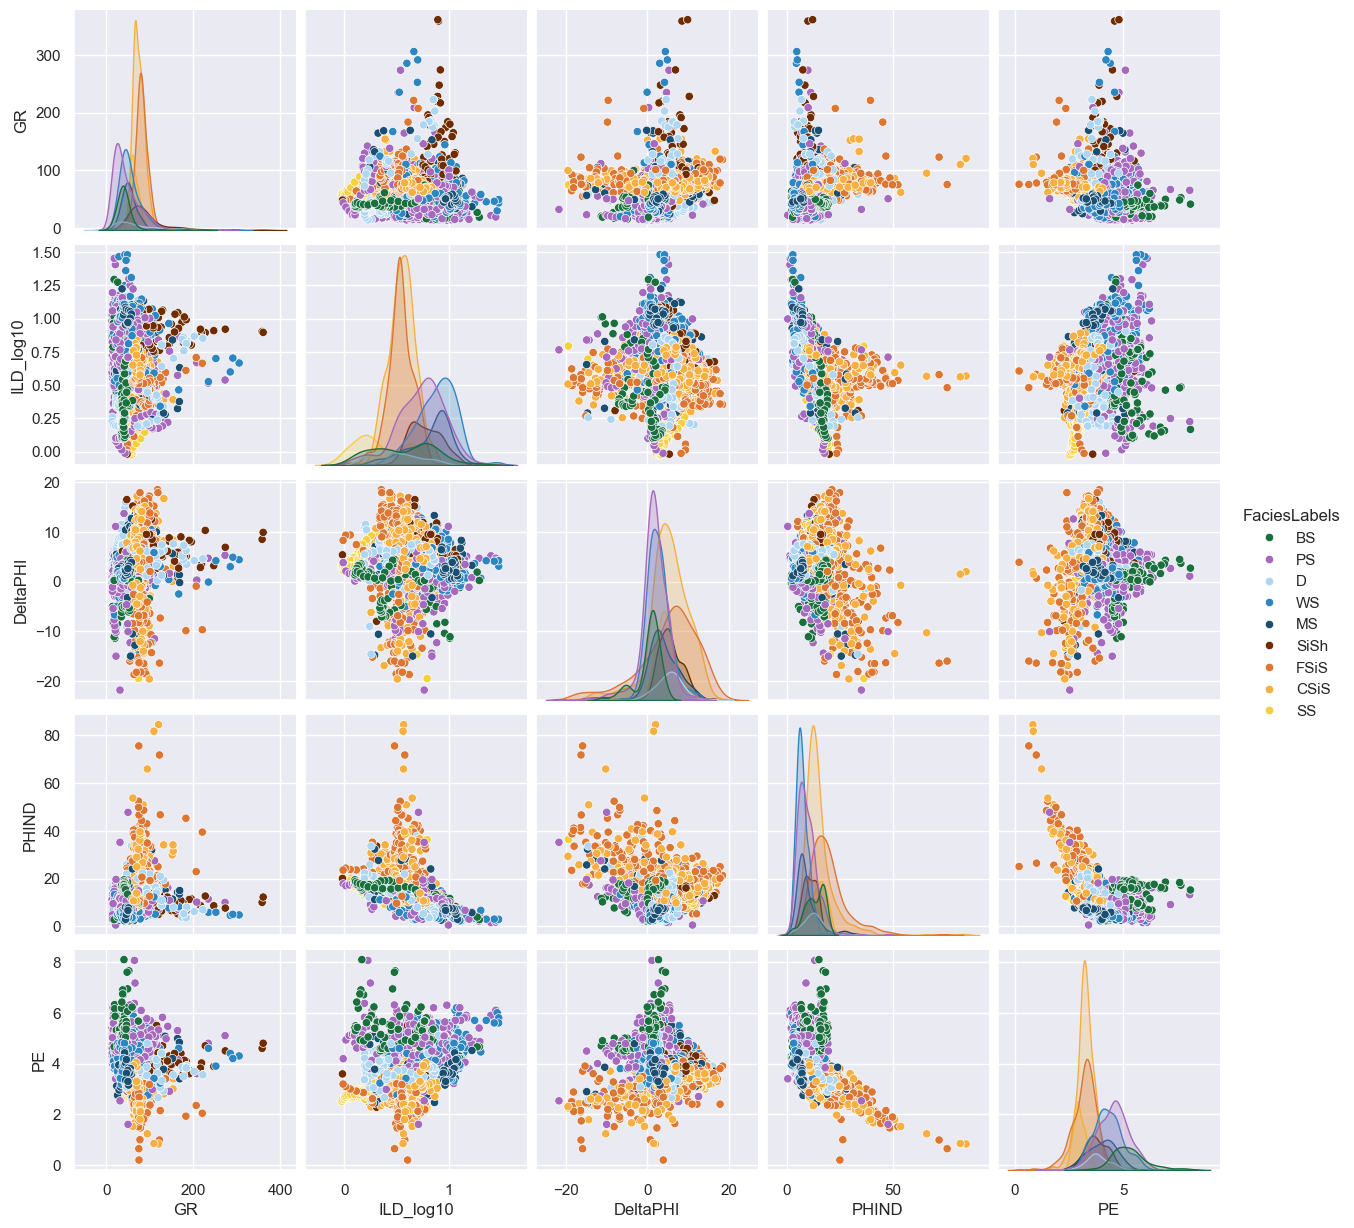

In [19]:
sns.set()
sns.pairplot(data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

Let's take a look at the data from individual wells in a more familiar log plot form. We will create plots for the five well log variables, as well as a log for facies labels.

In [20]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS',
                                'SiSh', ' MS ', ' WS ', ' D  ',
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

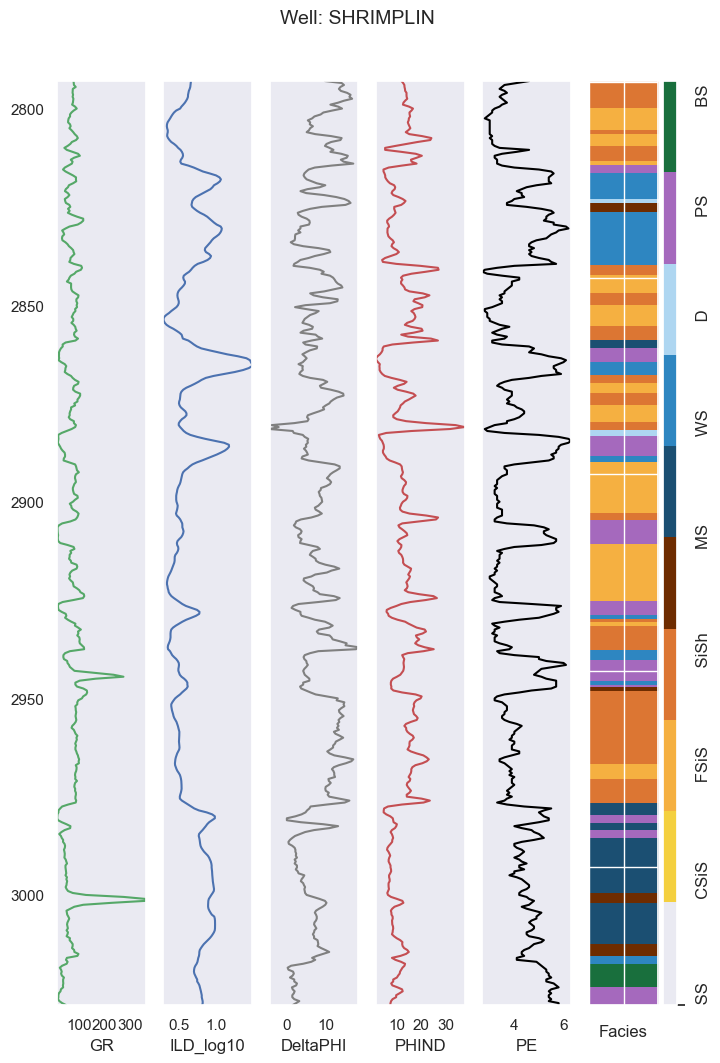

In [21]:
make_facies_log_plot(
    data[data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)

In addition to individual wells, we can look at how the various facies are represented by the entire training set.  Let's plot a histgram of the number of training examples for each facies class.

SS      170
CSiS    649
FSiS    498
SiSh    177
MS      198
WS      391
D        81
PS      458
BS      161
Name: count, dtype: int64

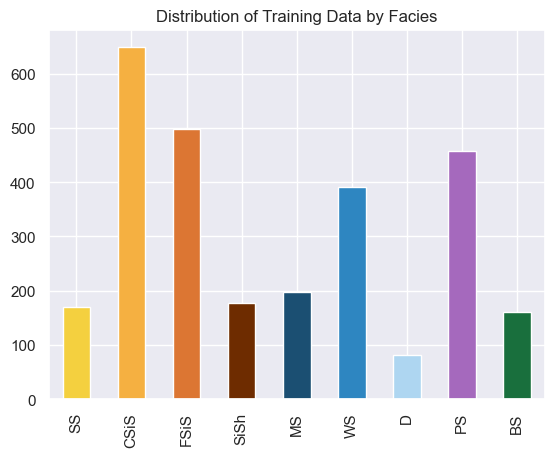

In [22]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors,
                   title='Distribution of Training Data by Facies')
facies_counts

# Machine Learning

In [23]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS


In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [25]:
# Drop any rows with missing values
data = data.dropna()

In [26]:
# Encode categorical variables
le = LabelEncoder()
data['Formation'] = le.fit_transform(data['Formation'])
data['Well Name'] = le.fit_transform(data['Well Name'])
data['FaciesLabels'] = le.fit_transform(data['Facies'])

In [27]:
# Drop the original 'Facies' column if needed
data = data.drop('Facies', axis=1)

In [28]:
# Split data into features (X) and labels (y)
X = data.drop('FaciesLabels', axis=1)
y = data['FaciesLabels']

In [29]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Now, X_train and X_test contain the features, and y_train and y_test contain the labels.


## Training the SVM classifier

Now we use the cleaned and conditioned training set to create a facies classifier.  As mentioned above, we will use a type of machine learning model known as a [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine).  The SVM is a map of the feature vectors as points in a multi dimensional space, mapped so that examples from different facies are divided by a clear gap that is as wide as possible.  

The SVM implementation in [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) takes a number of important parameters.  First we create a classifier using the default settings.  

In [31]:
from sklearn import svm

SVM = svm.SVC()

Now we can train the classifier using the training set we created above.

In [32]:
SVM.fit(X_train,y_train)

SVC()

Now that the model has been trained on our data, we can use it to predict the facies of the feature vectors in the test set.  Because we know the true facies labels of the vectors in the test set, we can use the results to evaluate the accuracy of the classifier.

In [33]:
predicted_labels = SVM.predict(X_test)

We need some metrics to evaluate how good our classifier is doing.  A [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) is a table that can be used to describe the performance of a classification model.  [Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) allows us to easily create a confusion matrix by supplying the actual and predicted facies labels.

The confusion matrix is simply a 2D array.  The entries of confusion matrix `C[i][j]` are equal to the number of observations predicted to have facies `j`, but are known to have facies `i`.  

To simplify reading the confusion matrix, a function has been written to display the matrix along with facies labels and various error metrics.  See the file `classification_utilities.py` in this repo for the `display_cm()` function.

In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [35]:
print("SVM Accuracy:", accuracy_score(y_test, predicted_labels))

SVM Accuracy: 0.6983842010771992


In [36]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        39
           1       0.77      0.82      0.79       130
           2       0.69      0.73      0.71        84
           3       0.64      0.76      0.69        33
           4       0.86      0.32      0.46        60
           5       0.49      0.62      0.55        72
           6       0.85      0.65      0.73        17
           7       0.65      0.73      0.69        88
           8       0.80      0.82      0.81        34

    accuracy                           0.70       557
   macro avg       0.74      0.69      0.70       557
weighted avg       0.72      0.70      0.69       557



In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=5)  # You can adjust the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [39]:
# Evaluate the models
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))

K-Nearest Neighbors (KNN) Accuracy: 0.7612208258527827
Decision Tree Accuracy: 0.5565529622980251
Random Forest Accuracy: 0.7827648114901257


Random Forest seems to be doing better than the rest.

In [ ]:
# Updated code cell
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))

## Applying the classification model to the blind data

We held a well back (SHANKLE) from the training, and stored it in a dataframe called `test_well`:

In [40]:
test_well.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
471,2,A1 SH,SHANKLE,2774.5,98.36,0.642,-0.1,18.685,2.9,1,1.000
472,2,A1 SH,SHANKLE,2775.0,97.57,0.631,7.9,16.745,3.2,1,0.984
473,2,A1 SH,SHANKLE,2775.5,98.41,0.615,12.8,14.105,3.2,1,0.968
474,2,A1 SH,SHANKLE,2776.0,85.92,0.597,13.0,13.385,3.4,1,0.952
475,2,A1 SH,SHANKLE,2776.5,83.16,0.592,12.3,13.345,3.4,1,0.935


In [41]:
# Drop any rows with missing values
test_well = test_well.dropna()

In [42]:
# Encode categorical variables using the same LabelEncoder used for training data
test_well['Formation'] = le.fit_transform(test_well['Formation'])
test_well['Well Name'] = le.fit_transform(test_well['Well Name'])


In [43]:
test_well.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
471,2,1,0,2774.5,98.36,0.642,-0.1,18.685,2.9,1,1.000
472,2,1,0,2775.0,97.57,0.631,7.9,16.745,3.2,1,0.984
473,2,1,0,2775.5,98.41,0.615,12.8,14.105,3.2,1,0.968
474,2,1,0,2776.0,85.92,0.597,13.0,13.385,3.4,1,0.952
475,2,1,0,2776.5,83.16,0.592,12.3,13.345,3.4,1,0.935


In [44]:
# Standardize numerical features using the same StandardScaler used for training data
X_test_well_scaled = scaler.transform(test_well.drop(['Facies'], axis=1))

In [45]:
# Make predictions on the test data
predictions = random_forest.predict(X_test_well_scaled)

In [46]:
# Print the classification report
print("Classification Report:")
print(classification_report(test_well['Facies'], predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.36      0.79      0.49        89
           2       0.30      0.26      0.28        89
           3       0.00      0.00      0.00       117
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00        71
           7       0.08      0.35      0.13        17
           8       0.00      0.00      0.00        40

    accuracy                           0.22       449
   macro avg       0.08      0.16      0.10       449
weighted avg       0.13      0.22      0.16       449



C:\Users\amale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{


## Time-Series Forecasting for Well Log Data

### Objective
To analyze trends in **Gamma Ray (GR)** logs across multiple wells and forecast future values using depth as a sequence.

### Implementation
We'll use machine learning models to predict **GR** values based on depth for each well. The methodology includes:

1. Grouping the data by well.
2. Using depth as the temporal sequence.
3. Training and testing a regression model (e.g., Random Forest) for forecasting.
This implementation provides a scalable approach for forecasting and analyzing trends in reservoir characterization data.


Processing Well: CHURCHMAN BIBLE


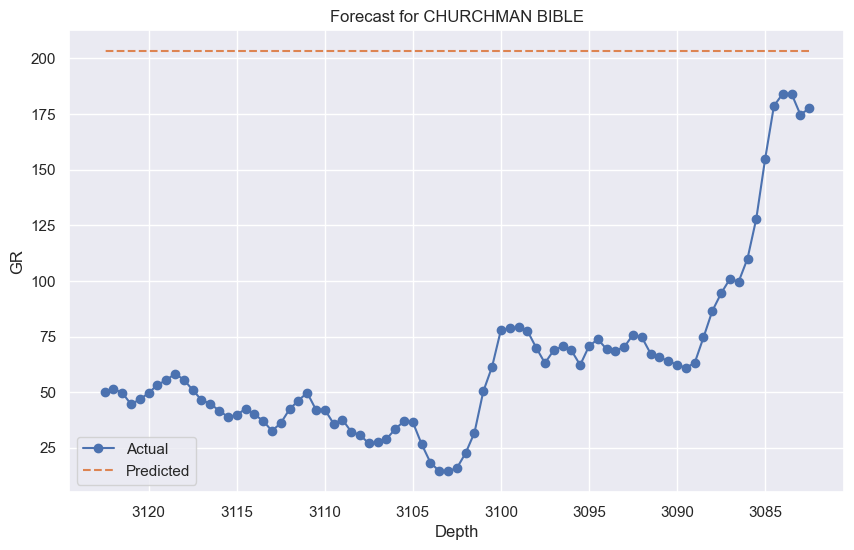

Processing Well: CROSS H CATTLE


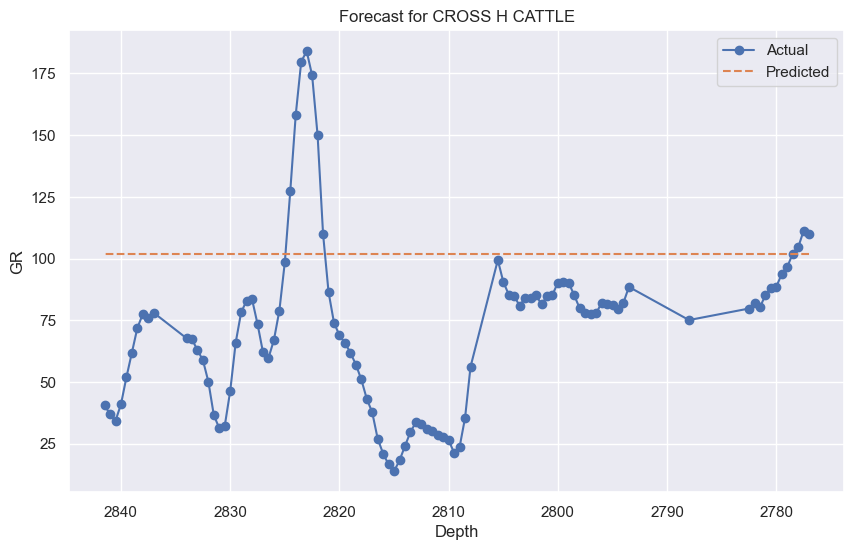

Processing Well: LUKE G U


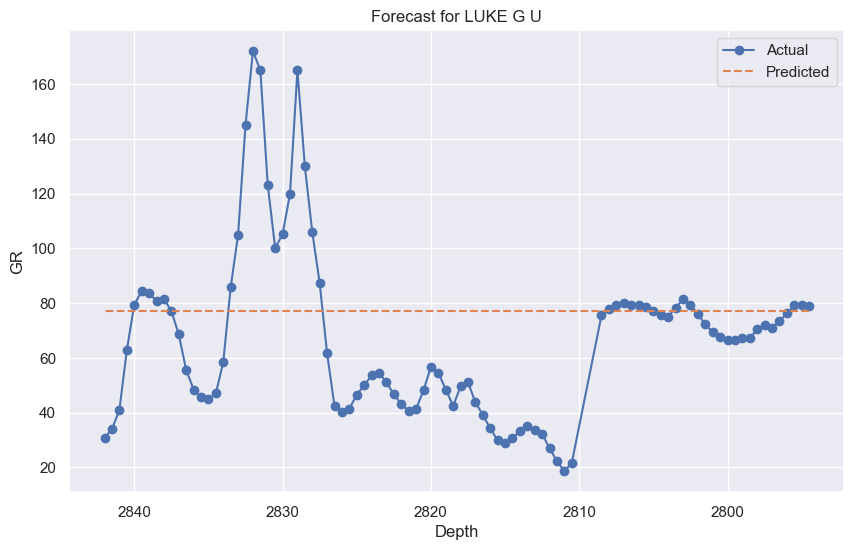

Processing Well: NEWBY


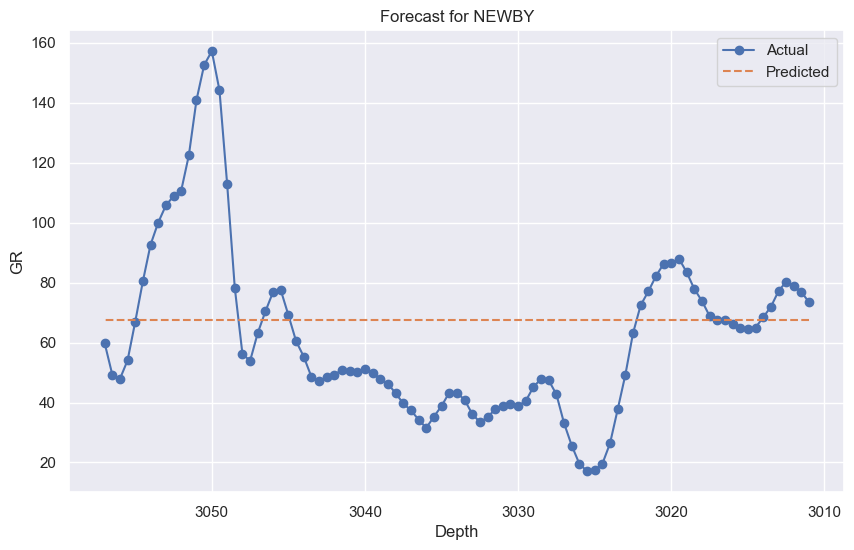

Processing Well: NOLAN


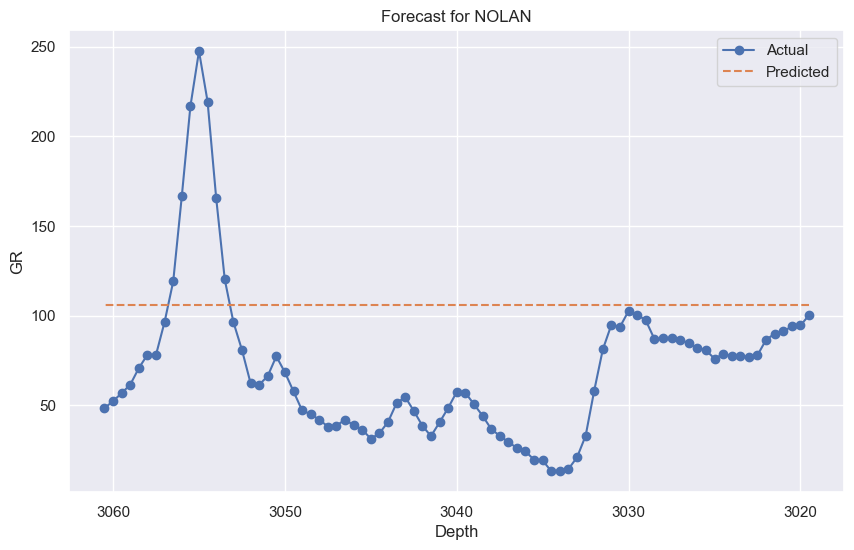

Processing Well: Recruit F9


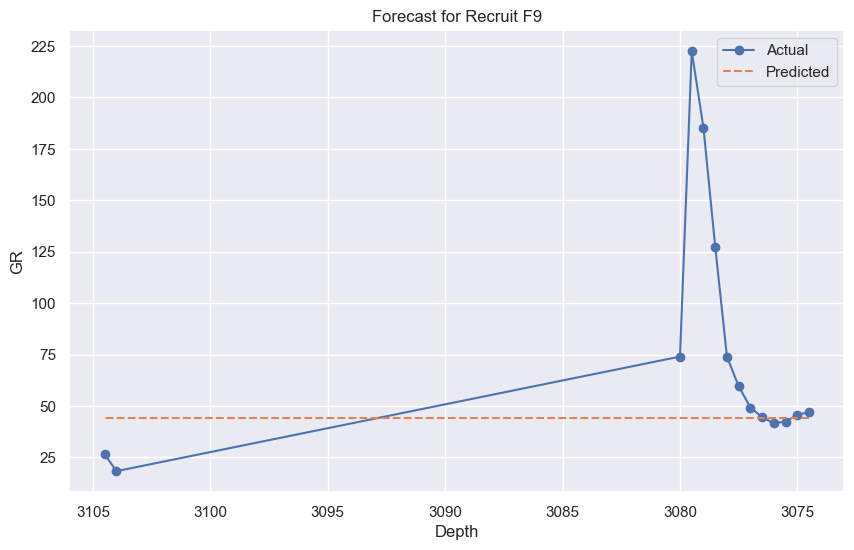

Processing Well: SHANKLE


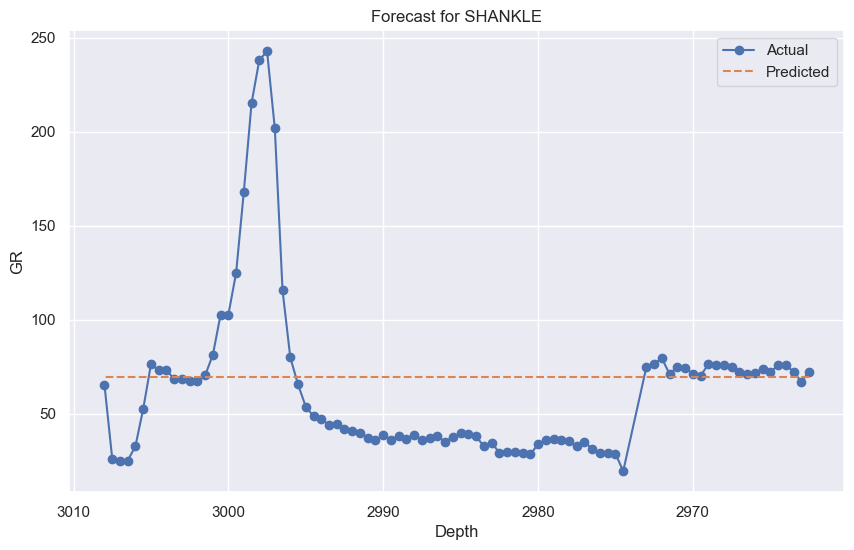

Processing Well: SHRIMPLIN


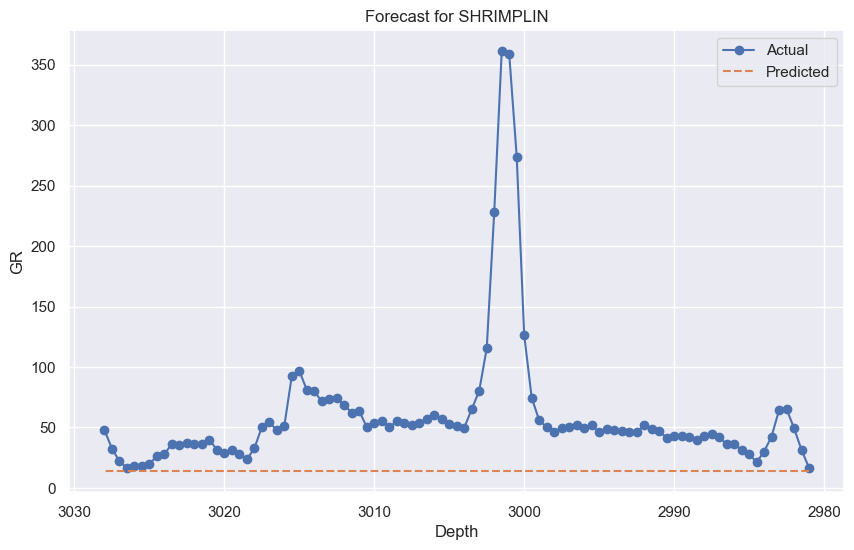

Well: CHURCHMAN BIBLE, RMSE: 145.24
Well: CROSS H CATTLE, RMSE: 45.67
Well: LUKE G U, RMSE: 32.45
Well: NEWBY, RMSE: 29.27
Well: NOLAN, RMSE: 55.71
Well: Recruit F9, RMSE: 66.33
Well: SHANKLE, RMSE: 43.56
Well: SHRIMPLIN, RMSE: 72.47


In [47]:

# Time-Series Forecasting for Well Log Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and sort the dataset
data = pd.read_csv("training_data.csv")
data = data.sort_values(by=["Well Name", "Depth"])

# Feature for forecasting
feature = "GR"

# Results dictionary
forecast_results = {}

for well, group in data.groupby("Well Name"):
    print(f"Processing Well: {well}")
    group = group.dropna(subset=[feature])
    X = group["Depth"].values.reshape(-1, 1)
    y = group[feature].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    forecast_results[well] = {'RMSE': rmse, 'Model': model}
    plt.figure(figsize=(10, 6))
    plt.plot(X_test, y_test, label="Actual", marker="o")
    plt.plot(X_test, y_pred, label="Predicted", linestyle="--")
    plt.gca().invert_xaxis()
    plt.title(f"Forecast for {well}")
    plt.xlabel("Depth")
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Summary of results
for well, result in forecast_results.items():
    print(f"Well: {well}, RMSE: {result['RMSE']:.2f}")
